# <center> Veri Bilimi Bitirme Projesi </center>
## <center> Fetal Sağlık Sınıflandırması </center>

![alt_text](https://brownpelicanla.com/wp-content/uploads/2018/09/Scientist-Fetus-Embryo-healthy-Life-Baby-Science-Studies-900.jpg)


#### <center> *Mustafa Kollu - 21627485* </center>
#### <center> *Sadık Can Acar - 21626843* </center>
#### <center> *Grup 21* </center>

**Özet**

Hamilelik ve fetal gelişim, genellikle başarılı ve karmaşık olmasa da, son derece karmaşık bir biyolojik süreçtir. Fetüsün beklentilere göre gelişip gelişmediğini belirleme yöntemlerinden biri de kardiyotokografidir. Bu teşhis tekniğinin amacı, fetüsün kalbi tamamen işlevsel olduğunda, genellikle gebeliğin üçüncü trimesterinde fetal kalp atış hızını ve annesinin uterus kasılmalarını ölçmektir. Bir kardiyotokgramın çıktıları genellikle şu üç koşuldan birine ait olarak yorumlanır: fizyolojik, şüpheli ve patolojik. Bu veri setini fetüsün sağlığını etkileyen faktörleri görmek ve modelimizi eğitmek için kullanırız. Oluşturduğumuz model, fetüsün sağlık durumunu tahmin etmek için kullanılmaktadır. Projede çeşitli sınıflandırma yöntemlerini (KNN, SVM, Karar Ağacı Sınıflandırıcı, Random Orman Sınıflandırıcısı, Gaussian Naive Bayes) kullandık ve karşılaştırdık. En yüksek puanı aldığımız model Random Forest sınıflandırma algoritmasıdır.

## İçerik Tablosu
[1.Problem](#problem)   
[2.Verilerin Anlaşılması](#data_understanding)   
[3.Verilerin Hazırlanması](#data_preparation)   
[4.Modelleme ve Değerlendirme](#modeling)   
[5.Sonuç](#conclusion)   
[6.Referanslar](#references)

## 1. Problem <a class="anchor" id="problem"></a>

Doğum öncesi bakımın kalitesi hala iyileşiyor ve fetüs ölüm oranı her yıl azalsa da, bir fetüsün gelişiminin sonraki aşamalarında ölümü hala çok gerçek bir olasılıktır. Bu nedenle, tüm gebelik boyunca fetüs gözlemi ve gerçek durum değerlendirmesi çok önemlidir. Doğum öncesi bakım, fetüsler duygularını ve sorunlarını doğum uzmanına anlatmaktan aciz oldukları için en zor tıp dallarından biridir. Bu nedenle kadın doğum uzmanları ultrason, elektrokardiyografi veya ekokardiyografi gibi araçları kullanarak yalnızca fiziksel belirtileri gözlemleyebilirler.

**Araştırma soruları**:

    1. Bir fetüs için ne kadar doğru teşhis koyabiliriz?
    2. Fetüsün sağlığını kontrol etmek için maliyetli ve zor testler ve prosedürler gerekli midir? Makine öğrenimini kullanarak geçmiş verilerden fetüs sağlığı hakkında sonuçlar çıkarabilir miyiz?
    
Makine öğrenimi yaklaşımlarını kullanarak fetal sağlık tespiti için sınıflandırma modellerini kullanacağız. Ayrıca fetal sağlıkta en önemli faktörlerin ne olduğunu bulmak için veri setimizdeki özellikler arasındaki ilişkileri inceleyeceğiz.

### _Veri Seti_

Veri setinin linki : https://www.kaggle.com/andrewmvd/fetal-health-classification

Kardiyotokografi ölçümlerinden elde edilen sonuçlarla hazırlanan veri setinin açıklaması aşağıda sütun başlığı ve anlamı şeklinde verilmiştir.

    'baseline value'- Fetal heart rate baseline (beats per minute)
    'accelerations'- Number of accelerations per second
    'fetal_movement'- Number of fetal movements per second
    'uterine_contractions'- Number of uterine contractions per second
    'light_decelerations'- Number of light decelerations per second
    'severe_decelerations'- Number of severe decelerations per second
    'prolongued_decelerations'- Number of prolonged decelerations per second
    'abnormal_short_term_variability'- Percentage of time with abnormal short term variability
    'mean_value_of_short_term_variability'- Mean value of short term variability
    'percentage_of_time_with_abnormal_long_term_variability'- Percentage of time with abnormal long term variability
    'mean_value_of_long_term_variability'- Mean value of long term variability
    'histogram_width'- Width of FHR histogram
    'histogram_min'- Minimum (low frequency) of FHR histogram
    'histogram_max'- Maximum (high frequency) of FHR histogram
    'histogram_number_of_peaks'- Number of histogram peaks
    'histogram_number_of_zeroes'- Number of histogram zeros
    'histogram_mode'- Histogram mode
    'histogram_mean'- Histogram mean
    'histogram_median'- Histogram median
    'histogram_variance'- Histogram variance
    'histogram_tendency'- Histogram tendency
    'fetal_health'- Tagged as 1 (Normal), 2 (Suspect) and 3 (Pathological)

### _Gerekli Kütüphanelerin Eklenmesi_

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Verilerin Anlaşılması <a class="anchor" id="data_understanding"></a>

Verilerin anlaşılması aşaması, 'Toplanan veriler sorunumuzu çözmek için yeterli mi?' sorusunu yanıtlar. Verileri anlama aşamasında verilerimizin satır ve sütunlarını inceledik. Verilerin daha iyi anlaşılması için histogramlar gibi grafikler çizecek ve veri setimizi yorumlayacağız. Bu tür metodolojilerle, verilerimizde eksik veri, yinelenen veri ve geçersiz veri olup olmadığını detaylı olarak gözlemleyeceğiz.

### _Verinin İncelenmesi_

Verilerimizi okuyarak verileri anlama sürecini başlatıyoruz.

In [2]:
data = pd.read_csv('fetal_health.csv')

Aşağıda veri setimizin ilk ve son 10 satırını görüyoruz. Bazı verilerimizin değer aralıklarının çok düşük olduğunu görüyoruz.

In [3]:
data.head(10)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.000,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.000,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.000,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.000,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.000,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
5,134.0,0.001,0.0,0.010,0.009,0.0,0.002,26.0,5.9,0.0,...,50.0,200.0,5.0,3.0,76.0,107.0,107.0,170.0,0.0,3.0
6,134.0,0.001,0.0,0.013,0.008,0.0,0.003,29.0,6.3,0.0,...,50.0,200.0,6.0,3.0,71.0,107.0,106.0,215.0,0.0,3.0
7,122.0,0.000,0.0,0.000,0.000,0.0,0.000,83.0,0.5,6.0,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0
8,122.0,0.000,0.0,0.002,0.000,0.0,0.000,84.0,0.5,5.0,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0
9,122.0,0.000,0.0,0.003,0.000,0.0,0.000,86.0,0.3,6.0,...,62.0,130.0,1.0,0.0,122.0,122.0,123.0,1.0,1.0,3.0


In [4]:
data.tail(10)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
2116,140.0,0.004,0.000,0.004,0.000,0.0,0.0,80.0,0.2,36.0,...,140.0,158.0,1.0,0.0,147.0,148.0,149.0,1.0,0.0,1.0
2117,140.0,0.000,0.000,0.008,0.000,0.0,0.0,79.0,0.3,20.0,...,124.0,150.0,1.0,0.0,144.0,143.0,145.0,1.0,1.0,1.0
2118,140.0,0.000,0.000,0.006,0.001,0.0,0.0,79.0,0.5,26.0,...,129.0,150.0,1.0,0.0,145.0,142.0,145.0,2.0,1.0,1.0
2119,140.0,0.000,0.000,0.007,0.001,0.0,0.0,79.0,0.6,27.0,...,124.0,150.0,1.0,0.0,144.0,141.0,145.0,1.0,1.0,1.0
2120,140.0,0.000,0.000,0.005,0.001,0.0,0.0,77.0,0.7,17.0,...,124.0,155.0,2.0,0.0,145.0,143.0,145.0,2.0,0.0,1.0
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0
2125,142.0,0.002,0.002,0.008,0.000,0.0,0.0,74.0,0.4,36.0,...,117.0,159.0,2.0,1.0,145.0,143.0,145.0,1.0,0.0,1.0


Veri bilgisi bölümünde tüm verilerimizin float değerinde olduğunu görüyoruz. Kategorik verilerimiz olmadığı için verilerimiz üzerinde OneHotEncoding gibi işlemler yapmak zorunda olmadığımızı görüyoruz. Aynı zamanda veri setimizin 2126 satır ve 22 sütundan oluştuğunu görüyoruz.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

Veri setimizde eksik değerleri kontrol ediyoruz. Bu işlemden sonra veri setimizde eksik veri olmadığını görüyoruz.

In [6]:
data.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

Veri setimiz hakkında istatistiksel bilgilere ulaşmak için aşağıdaki işlemi gerçekleştirdik. Burada, her sütun için ortalama, standart sapma, minimum-maksimum, veri sayısı, alt çeyrek-üst çeyrek ve medyan gibi değerleri görüyoruz. Bazı sütunlarımızın çeyrek değerlerine baktığımızda çok fazla 0 değer içerdiklerini görüyoruz. Bu durumun modellerimizin doğruluğunu azaltabileceğini söyleyebiliriz.

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


### _Hedef Sütunun İncelenmesi_

Hedef etiketimiz olan 'fetal_health' sütununa baktığımızda fetüslerin çoğunun sağlıklı olduğunu görüyoruz. Yine de fetüslerin sağlığının inkar edilemez şekilde şüpheli ve patolojik olduğunu görüyoruz.

c:\users\can_a\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

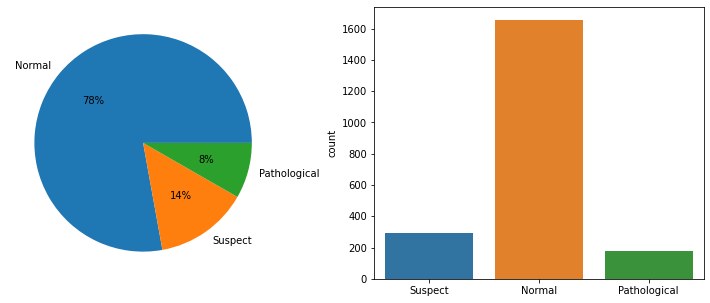

In [8]:
a, b, c = data['fetal_health'].value_counts()
plt.figure(figsize=(13, 5))
plt.subplot(121)
plt.pie([a, b, c], labels=['Normal', 'Suspect', 'Pathological'], autopct='%1.0f%%')
status = {1: 'Normal', 2: 'Suspect', 3: 'Pathological'}
fetal = [status[i] for i in data['fetal_health']]
plt.subplot(122)
sns.countplot(fetal)

## 3. Verilerin Hazırlanması <a class="anchor" id="data_preparation"></a>

Veri hazırlama aşamasında, modellemede kullanılacak verileri oluşturan tüm faaliyetler bulunmaktadır. Projemizin veri anlama kısmında verilerimizin çok karmaşık olmadığını gözlemledik. Sütun başlıkları gibi bazı yerlerde sorunlar vardı. Veri hazırlama aşamasında verilerimizi temizleyecek, eksik ve yinelenen verileri kontrol edecek ve verilerimizi makine öğrenimi yaklaşımlarına uyarlayacağız.

**1. Neden veri hazırlığı yapıyoruz?**
    
    Basitçe ifade etmek gerekirse, veri hazırlama, ham verileri elde etme ve bir analiz platformunda kullanıma sunma sürecidir. Hazırlığın son aşamasına ulaşmak için veriler temizlenmeli, biçimlendirilmeli ve analiz araçlarıyla sindirilebilir bir şeye dönüştürülmelidir. Bunlar, sütunları birleştirme / bölme, formatları değiştirme, gereksiz veya gereksiz verileri silme ve verilerde düzeltme yapma gibi çok çeşitli adımları içerebilir.
    
**2. Tüm bu zaman ve çaba veri bilimcileri için ne yapıyor?**
    
    Her şey güven ile ilgili. Verilere güvenin, sürece güvenin ve verilerden elde edilen içgörülere güvenin. Veri hazırlama, doğru içgörüler sağlayan verilerde doğruluğu garanti eder. Veri hazırlığı olmadan, önemsiz veriler, gözden kaçan bir kalibrasyon sorunu veya veri kümeleri arasında kolayca düzeltilebilen bir tutarsızlık nedeniyle içgörüler kapatılabilir.

### _Kayıp Değerlerin Kontrolü_

Öncelikle verilerimizdeki null değerleri (varsa) NaN değerlerine çeviriyoruz. Bu işlemden sonra NaN değerlerini kontrol ediyoruz. Veri setimizde boşluk olmadığını ve NaN değerinin olmadığını görüyoruz.

In [9]:
data.replace(" ",np.nan,inplace=True)

In [10]:
data.isnull().sum() / data.shape[0] * 100

baseline value                                            0.0
accelerations                                             0.0
fetal_movement                                            0.0
uterine_contractions                                      0.0
light_decelerations                                       0.0
severe_decelerations                                      0.0
prolongued_decelerations                                  0.0
abnormal_short_term_variability                           0.0
mean_value_of_short_term_variability                      0.0
percentage_of_time_with_abnormal_long_term_variability    0.0
mean_value_of_long_term_variability                       0.0
histogram_width                                           0.0
histogram_min                                             0.0
histogram_max                                             0.0
histogram_number_of_peaks                                 0.0
histogram_number_of_zeroes                                0.0
histogra

### _Tekrarlanan Satırların Kontrolü_

Veri setimizde boşluk-NaN değerleri olup olmadığını kontrol ettikten sonra, verilerimizde yinelenen satırların varlığını kontrol ediyoruz. Veri setimizde tekrarlanan 13 satır olduğunu görüyoruz. Bu yinelenen satırları sileriz, yinelenen satırları silmezsek modelimiz için aşırı bir uyumla karşılaşırız. Yinelenen satırları silmeden önce, veri setimizde 2126 satır varken satırlar silindikten sonra 2113 satır kalmıştır.

In [11]:
duplicate_rows_data = data[data.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (13, 22)


In [12]:
data.shape

(2126, 22)

In [13]:
data.drop_duplicates(inplace=True)

In [14]:
data.shape

(2113, 22)

### _Sütun Başlıklarını Yeniden Adlandırma_

Veri setimizi kullanmadan önce, kullanım kolaylığı için sütun adlarını sembollerle değiştirdik. Aşağıda sembollerin hangi sütuna karşılık geldiğini görüyoruz. Sütun isimleri değiştikten sonra data bilgisi ile kontrol ettik.
    
    Variable symbol   Variable description
    
    LB                Fetal heart rate baseline (beats per minute)
    AC                Number of accelerations per second
    FM                Number of fetal movements per second
    UC                Number of uterine contractions per second
    DL                Number of light decelerations per second
    DS                Number of severe decelerations per second
    DP                Number of prolonged decelerations per second
    ASTV              Percentage of time with abnormal short-term variability
    MSTV              Mean value of short-term variability
    ALTV              Percentage of time with abnormal long-term variability
    MLTV              Mean value of long-term variability
    Width             Width of fetal heart rate histogram
    Min               Minimum of fetal heart rate histogram
    Max               Maximum of fetal heart rate histogram
    Nmax              Number of histogram peaks
    Nzeros            Number of histogram zeroes
    Mode              Histogram mode
    Mean              Histogram mean
    Median            Histogram median
    Variance          Histogram variance
    Tendency          Histogram tendency
    NSP               Fetal state class code (N=Normal, S=Suspected, P=Pathological)

In [15]:
data.rename(columns= {'baseline value': 'LB',
                    'accelerations': 'AC',
                    'fetal_movement': 'FM',
                    'uterine_contractions': 'UC',
                    'light_decelerations': 'DL',
                    'severe_decelerations': 'DS',
                    'prolongued_decelerations': 'DP',
                    'abnormal_short_term_variability': 'ASTV',
                    'mean_value_of_short_term_variability': 'MSTV',
                    'percentage_of_time_with_abnormal_long_term_variability': 'ALTV',
                    'mean_value_of_long_term_variability': 'MLTV',
                    'histogram_width': 'Width',
                    'histogram_min': 'Min',
                    'histogram_max': 'Max',
                    'histogram_number_of_peaks': 'Nmax',
                    'histogram_number_of_zeroes': 'Nzeros',
                    'histogram_mode': 'Mode',
                    'histogram_mean': 'Mean',
                    'histogram_median': 'Median',
                    'histogram_variance': 'Variance',
                    'histogram_tendency': 'Tendency',
                    'fetal_health': 'NSP'}, inplace=True)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2113 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2113 non-null   float64
 1   AC        2113 non-null   float64
 2   FM        2113 non-null   float64
 3   UC        2113 non-null   float64
 4   DL        2113 non-null   float64
 5   DS        2113 non-null   float64
 6   DP        2113 non-null   float64
 7   ASTV      2113 non-null   float64
 8   MSTV      2113 non-null   float64
 9   ALTV      2113 non-null   float64
 10  MLTV      2113 non-null   float64
 11  Width     2113 non-null   float64
 12  Min       2113 non-null   float64
 13  Max       2113 non-null   float64
 14  Nmax      2113 non-null   float64
 15  Nzeros    2113 non-null   float64
 16  Mode      2113 non-null   float64
 17  Mean      2113 non-null   float64
 18  Median    2113 non-null   float64
 19  Variance  2113 non-null   float64
 20  Tendency  2113 non-null   floa

### _Tüm Sütunlar için Aykırı Değer Kontrolü_

Veri setimizdeki tüm sütunlarda aykırı değerleri kontrol ettik. LB, ASTV, Genişlik, Min gibi kolonlarda aykırı değerler olmadığını görüyoruz. MSTV, ALTV, MLTV, Max, Nmax, Nzeros, Mode, Ortalama, Medyan, Varyans gibi sütunlarda aykırı değerler gözlemledik. Bu aykırı değerleri silmek için aşağıdaki prosedürü uyguladık. Aykırı değeri olan satırlar silindikten sonra 2113 satır olan veri setimiz 1843 satıra indirilmiştir.

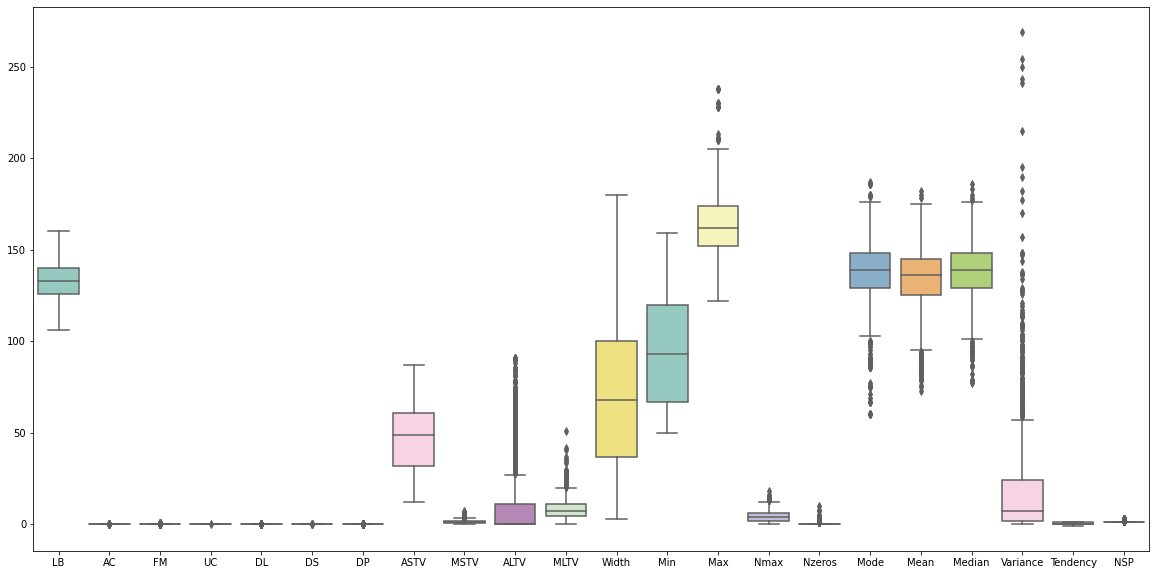

In [17]:
plt.figure(figsize=(20,10))
sns.boxplot(data=data, palette="Set3")
plt.show()

In [18]:
def removeOutlier(feature, dataframe):

    lowerBound = feature.mean() - 3 * feature.std()
    upperBound = feature.mean() + 3 * feature.std()

    print('Lower bound: ',lowerBound,' / Upper bound: ', upperBound )

    dataframe_1 = dataframe[(feature > lowerBound) & (feature < upperBound)]

    print((dataframe.shape[0] - dataframe_1.shape[0]), 'outliers from', dataframe.shape[0] )
    print('-----------------------------------------------------------------------')
    
    dataframe = dataframe_1.copy()

    return dataframe

### _Aykırı Değerleri Silme_

In [19]:
data = removeOutlier(data.MSTV, data)
data = removeOutlier(data.ALTV, data)
data = removeOutlier(data.MLTV, data)
data = removeOutlier(data.Max, data)
data = removeOutlier(data.Nmax, data)
data = removeOutlier(data.Nzeros, data)
data = removeOutlier(data.Mode, data)
data = removeOutlier(data.Mean, data)
data = removeOutlier(data.Median, data)
data = removeOutlier(data.Variance, data)

Lower bound:  -1.3180818585254301  / Upper bound:  3.9881244519944317
33 outliers from 2113
-----------------------------------------------------------------------
Lower bound:  -45.38054801678159  / Upper bound:  65.27189417062775
58 outliers from 2080
-----------------------------------------------------------------------
Lower bound:  -8.361148658320047  / Upper bound:  24.841267352682067
30 outliers from 2022
-----------------------------------------------------------------------
Lower bound:  111.80074704801987  / Upper bound:  216.36089953832553
13 outliers from 1992
-----------------------------------------------------------------------
Lower bound:  -4.619147217593986  / Upper bound:  12.6878687941478
15 outliers from 1979
-----------------------------------------------------------------------
Lower bound:  -1.6031331545462484  / Upper bound:  2.2182044376419716
20 outliers from 1964
-----------------------------------------------------------------------
Lower bound:  88.656036

In [20]:
data.shape

(1843, 22)

### _Korelasyon_

İstatistikte korelasyon, iki rastgele değişken veya iki değişkenli veri arasındaki nedensel olsun veya olmasın herhangi bir istatistiksel ilişkidir. En geniş anlamıyla korelasyon, herhangi bir istatistiksel ilişkidir, ancak genellikle bir çift değişkenin doğrusal olarak ilişkili olma derecesini ifade eder. Bağımlı fenomenlerin tanıdık örnekleri, ebeveynlerin boyu ile çocukları arasındaki korelasyonu ve talep eğrisinde gösterildiği gibi, bir malın fiyatı ile tüketicilerin satın almaya istekli olduğu miktar arasındaki korelasyonu içerir. Bağımsız ve hedef değişkenler arasında bir ilişki olup olmadığını kontrol ederiz.
    
Python kütüphanesi Pandas tarafından sağlanan data.corr () ile özellikler ve fetal sağlık durumları arasındaki ilişkiyi kontrol ettik. Bu değerler arasındaki ilişkiyi incelemek için bir ısı haritası çiziyoruz. Fetal sağlık koşulları ile özellikler arasındaki ilişkiye baktığımızda birçok özelliğin önemsiz olduğunu gördük. Bu işlemlerden sonra düşük korelasyonlu sütunları veri setimizden çıkardık. Veri setinin son versiyonuna baktığımızda hedef sütunla birlikte toplamda 11 sütunumuz olduğunu görüyoruz.

In [21]:
correlation = data.corr().round(2)
correlation

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
LB,1.00,-0.09,-0.03,-0.14,-0.14,-0.00,-0.07,0.35,-0.33,0.32,...,0.37,0.38,-0.09,-0.07,0.81,0.80,0.84,-0.15,0.25,0.26
AC,-0.09,1.00,0.07,0.09,-0.08,-0.02,-0.10,-0.27,0.28,-0.39,...,-0.18,0.45,0.23,-0.01,0.23,0.25,0.25,0.24,-0.00,-0.35
FM,-0.03,0.07,1.00,-0.06,0.05,-0.00,0.28,-0.08,0.12,-0.07,...,-0.15,0.08,0.11,-0.03,-0.04,-0.07,-0.04,0.18,0.03,0.06
UC,-0.14,0.09,-0.06,1.00,0.25,0.01,0.08,-0.23,0.28,-0.25,...,-0.06,0.06,0.06,0.06,-0.08,-0.16,-0.13,0.23,-0.06,-0.25
DL,-0.14,-0.08,0.05,0.25,1.00,-0.01,0.17,-0.15,0.55,-0.26,...,-0.54,0.12,0.38,0.27,-0.25,-0.46,-0.32,0.62,0.13,-0.07
DS,-0.00,-0.02,-0.00,0.01,-0.01,1.00,0.05,-0.02,0.00,-0.01,...,-0.03,-0.02,-0.02,0.03,-0.07,-0.04,-0.03,0.08,0.03,0.09
DP,-0.07,-0.10,0.28,0.08,0.17,0.05,1.00,0.01,0.19,-0.11,...,-0.20,0.01,0.13,0.05,-0.27,-0.34,-0.29,0.37,-0.07,0.35
ASTV,0.35,-0.27,-0.08,-0.23,-0.15,-0.02,0.01,1.00,-0.50,0.43,...,0.28,-0.09,-0.15,-0.18,0.18,0.19,0.22,-0.22,0.04,0.46
MSTV,-0.33,0.28,0.12,0.28,0.55,0.00,0.19,-0.50,1.00,-0.50,...,-0.61,0.29,0.48,0.27,-0.27,-0.43,-0.32,0.60,0.01,-0.25
ALTV,0.32,-0.39,-0.07,-0.25,-0.26,-0.01,-0.11,0.43,-0.50,1.00,...,0.40,-0.20,-0.24,-0.14,0.19,0.24,0.21,-0.32,-0.00,0.41


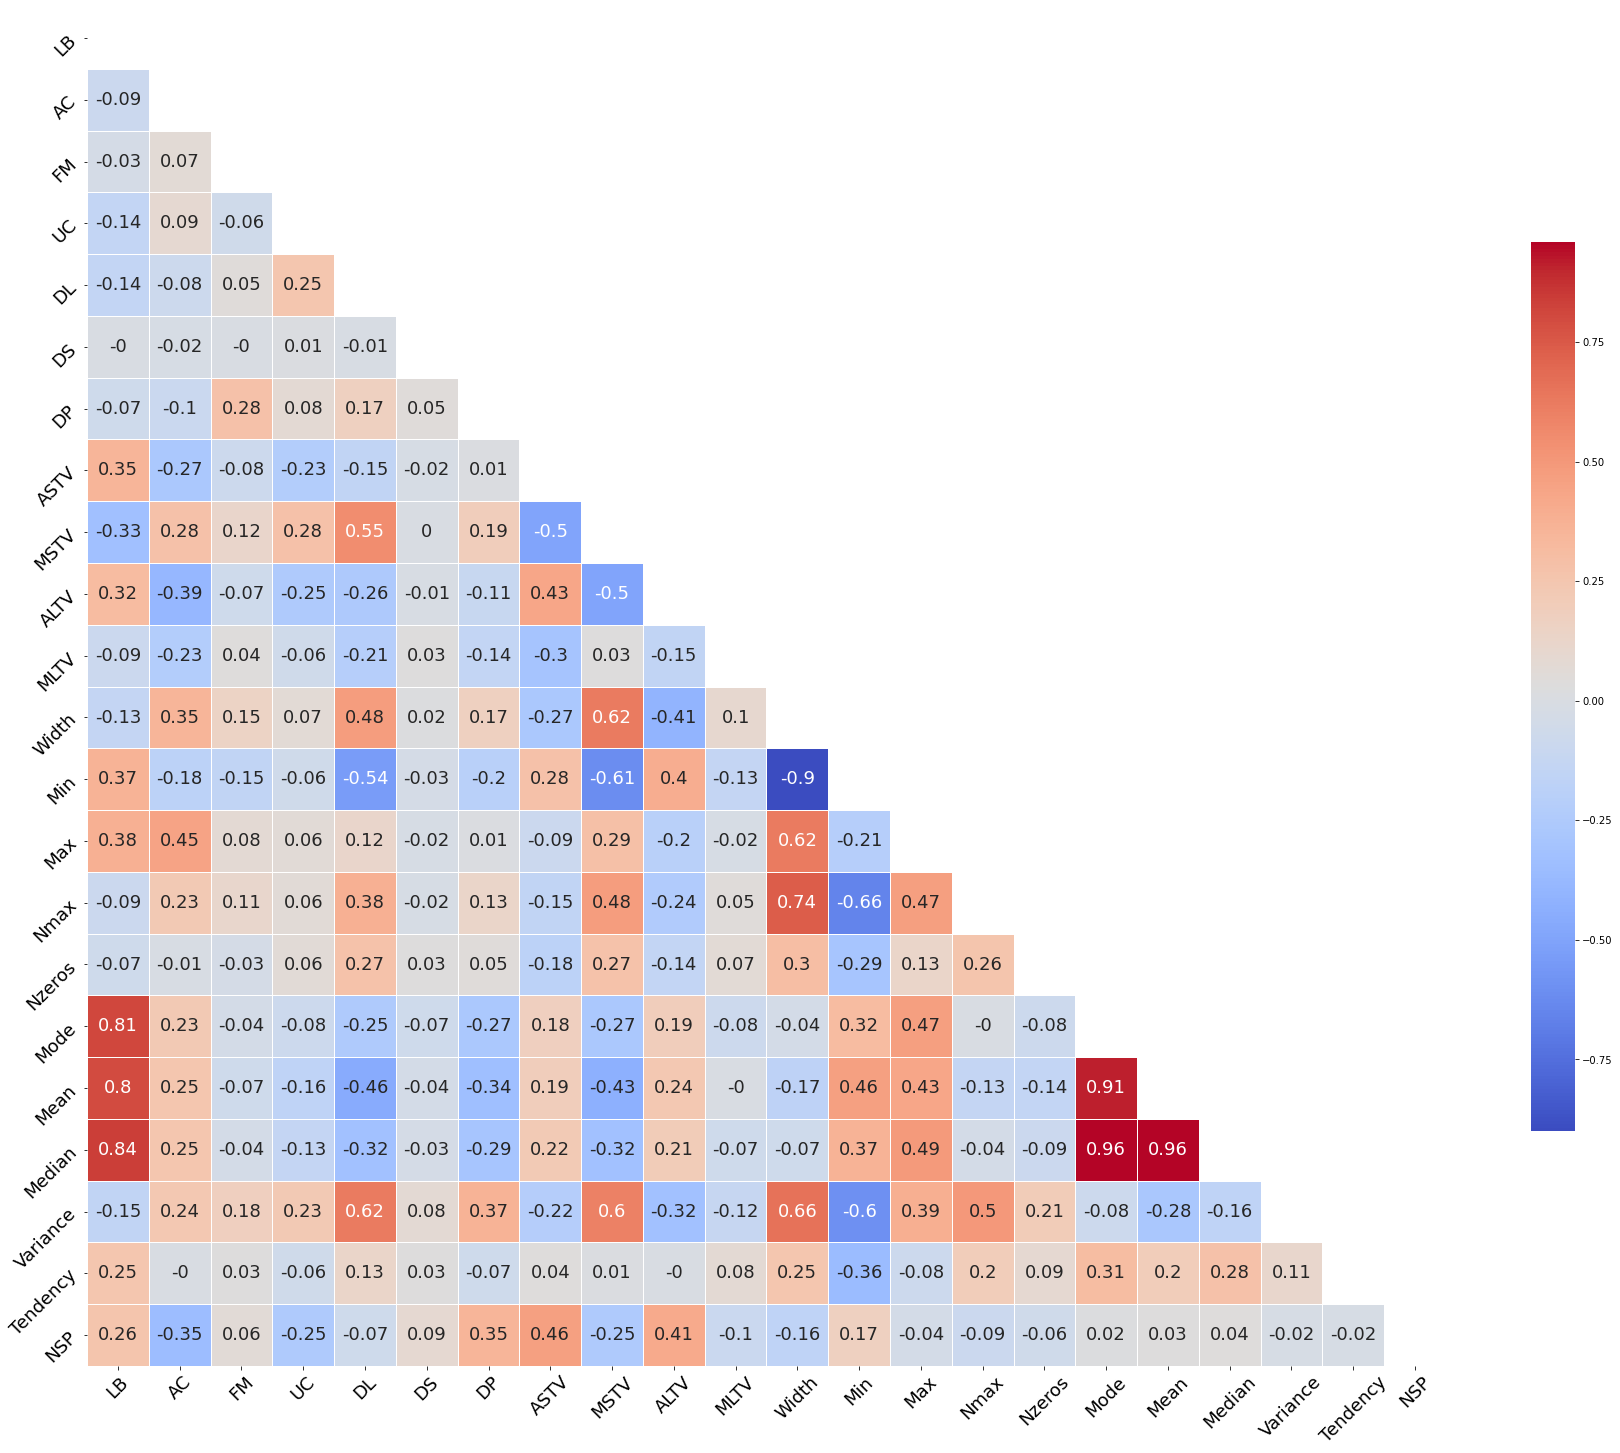

In [22]:
mask = np.zeros_like(correlation, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

# Set figure size
f, ax = plt.subplots(figsize=(25, 25))


# Draw the heatmap
hm = sns.heatmap(correlation, mask=mask,cmap='coolwarm',
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True,annot_kws={'size':18})
hm.set_xticklabels(hm.get_xmajorticklabels(), fontsize=18, rotation=45)
hm.set_yticklabels(hm.get_ymajorticklabels(), fontsize=18, rotation=45)

plt.tight_layout()

### _Düşük Korelasyona Sahip Sütunların Silinmesi_

In [23]:
data.drop(['AC', 'UC', 'DL', 'MSTV', 'MLTV', 'Width', 'Max', 
           'Nmax', 'Nzeros', 'Variance', 'Tendency'], axis=1, inplace=True)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1843 entries, 0 to 2125
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   LB      1843 non-null   float64
 1   FM      1843 non-null   float64
 2   DS      1843 non-null   float64
 3   DP      1843 non-null   float64
 4   ASTV    1843 non-null   float64
 5   ALTV    1843 non-null   float64
 6   Min     1843 non-null   float64
 7   Mode    1843 non-null   float64
 8   Mean    1843 non-null   float64
 9   Median  1843 non-null   float64
 10  NSP     1843 non-null   float64
dtypes: float64(11)
memory usage: 172.8 KB


### _Özellik Önemi_

Oluşturduğumuz bu modelin amacı daha az zaman ve maliyetle fetal sağlığı tespit etmek olduğu için özellik sayımızı modelimiz için gerekli sayıya indirmeye çalıştık. Bu yüzden özellik sayımızı ne kadar azaltabileceğimizi düşündük. Bunu yapmanın yolu, kalan özelliklerden hangisinin model için daha önemli olduğunu kontrol etmekti. Scikit-learn kütüphanesinde ExtraTreesClassifier ile özelliklerin önemini test etmeye çalıştık.

Özellik önemine baktığımızda, DS sütununun model için gerekli olmadığına karar verdik ve bu sütunu veri kümemizden kaldırdık. Veri setimizin son versiyonuna baktığımızda, hedef sütun ile birlikte toplamda 10 sütunumuz olduğunu görüyoruz.

In [25]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier() 
model.fit(data[['LB', 'FM', 'DS', 'DP', 'ASTV', 'ALTV', 'Min', 'Mode', 'Mean', 'Median']], data['NSP'])

ExtraTreesClassifier()

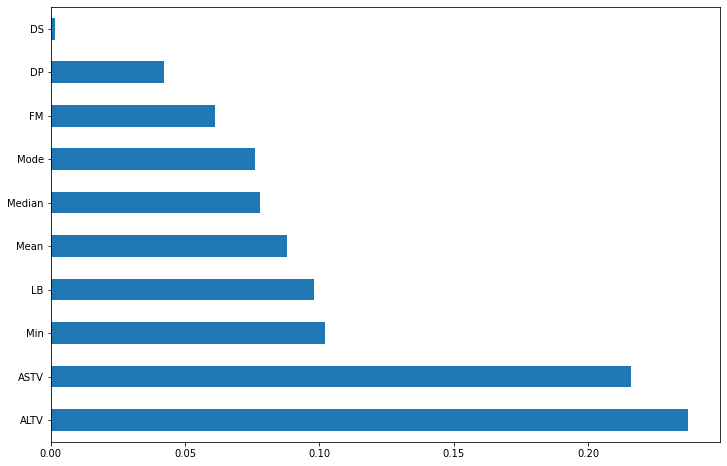

In [26]:
feature_importances = pd.Series(model.feature_importances_, index=data[['LB', 'FM', 'DS', 'DP', 'ASTV', 'ALTV', 
                                                                        'Min', 'Mode', 'Mean', 'Median']].columns)
plt.figure(figsize=(12,8))
feature_importances.nlargest(10).plot(kind='barh')
plt.show()

### _Özellik Önemine Göre Sütun Silinmesi_

In [27]:
data.drop(['DS'], axis=1, inplace=True)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1843 entries, 0 to 2125
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   LB      1843 non-null   float64
 1   FM      1843 non-null   float64
 2   DP      1843 non-null   float64
 3   ASTV    1843 non-null   float64
 4   ALTV    1843 non-null   float64
 5   Min     1843 non-null   float64
 6   Mode    1843 non-null   float64
 7   Mean    1843 non-null   float64
 8   Median  1843 non-null   float64
 9   NSP     1843 non-null   float64
dtypes: float64(10)
memory usage: 158.4 KB


### _Veri Kontrolü_

Veri setimizin son halini istatistiksel olarak analiz ettiğimizde, FM, DP, ALTV sütunlarının çok fazla 0 içerdiğini gördük. Tespitimizin ardından FM, DP ve ALTV unsurlarını yüzde olarak inceledik. Bu işlemden sonra DP'nin% 94'ünün 0'dan oluştuğunu görüyoruz. Modelimizi kirletmemesi için bu sütunu veri setimizden çıkarıyoruz. Verilerimizin son haline baktığımızda 22 sütundan oluşan veri setimizi 9 sütuna indirmiş olduk.

In [29]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
LB,1843.0,133.408030,9.756402,106.0,126.0,133.0,141.000,160.000
FM,1843.0,0.008320,0.044303,0.0,0.0,0.0,0.002,0.481
DP,1843.0,0.000086,0.000410,0.0,0.0,0.0,0.000,0.005
ASTV,1843.0,46.263700,16.858062,12.0,32.0,47.0,60.000,86.000
ALTV,1843.0,8.521975,15.147194,0.0,0.0,0.0,10.000,65.000
Min,1843.0,96.166576,28.387709,50.0,70.0,97.0,120.000,159.000
Mode,1843.0,139.015193,13.409883,89.0,129.0,140.0,148.000,180.000
Mean,1843.0,136.335323,13.348758,92.0,127.0,137.0,146.000,175.000
Median,1843.0,139.309278,12.880384,101.0,130.0,140.0,148.000,178.000
NSP,1843.0,1.208356,0.477502,1.0,1.0,1.0,1.000,3.000


In [30]:
data['FM'].value_counts() / data['FM'].shape[0] * 100

0.000    63.212154
0.001     7.325014
0.002     5.154639
0.003     4.015193
0.004     2.550190
           ...    
0.053     0.054259
0.477     0.054259
0.115     0.054259
0.051     0.054259
0.222     0.054259
Name: FM, Length: 88, dtype: float64

In [31]:
data['DP'].value_counts() / data['DP'].shape[0] * 100

0.000    94.736842
0.001     2.712968
0.002     1.953337
0.003     0.434075
0.004     0.108519
0.005     0.054259
Name: DP, dtype: float64

In [32]:
data['ALTV'].value_counts() / data['ALTV'].shape[0] * 100

0.0     57.460662
1.0      2.604449
2.0      2.387412
5.0      2.116115
4.0      1.899078
          ...    
57.0     0.162778
55.0     0.162778
51.0     0.108519
63.0     0.054259
65.0     0.054259
Name: ALTV, Length: 66, dtype: float64

### _Etkisiz Sütunların Silinmesi_

In [33]:
data.drop(['DP'], axis=1, inplace=True)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1843 entries, 0 to 2125
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   LB      1843 non-null   float64
 1   FM      1843 non-null   float64
 2   ASTV    1843 non-null   float64
 3   ALTV    1843 non-null   float64
 4   Min     1843 non-null   float64
 5   Mode    1843 non-null   float64
 6   Mean    1843 non-null   float64
 7   Median  1843 non-null   float64
 8   NSP     1843 non-null   float64
dtypes: float64(9)
memory usage: 144.0 KB


### _Eğitim-Teste Ayırma ve Veriyi Normalleştirme_

Veri hazırlamanın son aşaması olarak veri setimizi tren verisi ve test verisi olarak ayırıyoruz. Ayırma işlemini gerçekleştirdikten sonra trenimizin özelliklerini ve test verilerimizi normalleştiriyoruz.

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [36]:
X = data.iloc[:,:8]
y = data["NSP"]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

MinMax Ölçeklendirme, verilerin 0 ile 1 arasında değerler aldığı bir durumdur. Burada dağılım, verilerin dağılımına benzerdir. Burada "aykırı" olarak adlandırılan dış verilere karşı bir hassasiyet durumu söz konusudur, bu nedenle bu değerlerin çok yüksek olduğu bir durumda iyi performans göstermeyebilir. Ancak, veri setimizden aykırı değerleri temizlediğimiz için bunun bir sorun olmayacağını düşünüyoruz. Bu yüzden MinMaxScaler'ı kullanmaya karar verdik.

In [38]:
scaler = MinMaxScaler()
X_train_ND = scaler.fit_transform(X_train)
X_test_ND = scaler.fit_transform(X_test)

## 4.Modelleme ve Değerlendirme <a class="anchor" id="modeling"></a>

Önceki aşamalarda verilerimizi analiz edip temizledik. Modelleme ve değerlendirme aşamasında birçok modelleme tekniğini kullanacak ve modelimizi eğiteceğiz.

### Denetimli Öğrenme

Denetimli öğrenme, makine öğrenimi ve yapay zekanın bir alt kategorisidir. Verileri sınıflandırmak veya sonuçları doğru bir şekilde tahmin etmek için algoritmaları eğitmek için etiketli veri kümeleri kullanılarak tanımlanır. Girdi verileri modele beslenirken, model uygun şekilde takılana kadar ağırlıklarını ayarlar ve bu, çapraz doğrulama sürecinin bir parçası olarak gerçekleşir. Denetimli öğrenme, kuruluşların, istenmeyen postaları gelen kutunuzdan ayrı bir klasörde kategorize etmek gibi çeşitli gerçek dünya sorunlarını geniş ölçekte çözmelerine yardımcı olur.

Bu aşamada birçok denetimli öğrenme tekniğini kullanacağız ve bu tekniklerin değerlendirmesini göreceğiz. Bu teknikler Rastgele Orman Sınıflandırıcı, K-En Yakın Komşular, Karar Ağacı Sınıflandırıcı, Destek Vektör Makinesi, Gauss Naif Bayes'tir.

In [39]:
models = {} # Accuracy of each model

In [40]:
# Function showing the accuracy of each model in a single graph
def showFigure(fig, x, y):
    fig = plt.gcf()
    fig.set_size_inches(x, y)
    plt.show()

Aşağıdaki işlev, hedef sütunu ve tahmin edilen sütunu parametre olarak kullanarak doğruluk puanı, karışıklık matrisi, sınıflandırma raporu ve roc eğrisi gibi değerlendirme yöntemlerini çıkarır.

In [41]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score
from sklearn.preprocessing import LabelBinarizer
from mlxtend.plotting import plot_confusion_matrix

def evaluator(y_test, y_pred):    
 
    print("Accuracy Score : {:.6f}".format(accuracy_score(y_test, y_pred)),'\n')
    
    print('Classification Report: \n',classification_report(y_test,y_pred, 
                    target_names=['Normal', 'Suspect', 'Pathological']), '\n')
    
    lb = LabelBinarizer()
    y_test1 = lb.fit_transform(y_test)
    y_pred1 =lb.transform(y_pred)
    print('AUC_ROC Score: ',roc_auc_score(y_test1,y_pred1,average='macro'),'\n\n')
    
    fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8,11))

    cm = confusion_matrix(y_test,y_pred)
    sns.heatmap(
        data=cm,
        annot=True,
        fmt='.2f',
        linewidths=.5,
        xticklabels=['Normal', 'Suspect', 'Pathological'],
        yticklabels=['Normal', 'Suspect', 'Pathological'],
        ax=ax1
    )
    ax1.set_yticklabels(ax1.get_yticklabels(), rotation=45)
    ax1.set_title("Confusion Matrix")
    
    cm_n = confusion_matrix(y_test, y_pred, normalize="true")
    sns.heatmap(
        data=cm_n,
        annot=True,
        fmt='.2f',
        linewidths=.5,
        cmap='OrRd',
        xticklabels=['Normal', 'Suspect', 'Pathological'],
        yticklabels=['Normal', 'Suspect', 'Pathological'],
        ax=ax2
    )
    ax2.set_yticklabels(ax2.get_yticklabels(), rotation=45)
    ax2.set_title("Normalized Confusion Matrix")
    
    
    TP1 = cm[0, 0].sum()      # True Positive
    TN1 = cm[1:3, 1:3].sum()  # True Negative
    FP1 = cm[1:3, 0].sum()    # False Positive
    FN1 = cm[0, 1:3].sum()    # False Negative

    TP2 = cm[1, 1].sum()   
    TN2 = cm.sum()-cm[1,:].sum()-cm[:,1].sum()+cm[1,1].sum()
    FP2 = cm[:,1].sum()-cm[1,1].sum()
    FN2 = cm[1,:].sum()-cm[1,1].sum()

    TP3 = cm[2, 2].sum()   
    TN3 = cm[0:2, 0:2].sum()   
    FP3 = cm[0:2, 2].sum()
    FN3 = cm[2, 0:2].sum()   

    print("Accuracy of Normal = {:.4f}".format( (TP1+TN1)/(TP1+TN1+FP1+FN1) ) )
    print("Accuracy of Suspect = {:.4f}".format( (TP2+TN2)/(TP2+TN2+FP2+FN2) ) )
    print("Accuracy of Pathological = {:.4f}".format( (TP3+TN3)/(TP3+TN3+FP3+FN3) ) )
    print("\n")

### _Rastgele Orman Sınıflandırıcısı_

Bu makine öğrenimi modelini kullanmaya karar verdik çünkü rastgele orman hiperparametre tahmini olmadan iyi sonuçlar veriyor ve hem regresyon hem de sınıflandırma problemlerine uygulanabiliyor. Rastgele orman, günlük hayatta soru soran ve doğru tahminlerde bulunan insanlarla karşılaştırılabilir. Ancak geleneksel yöntemlerden biri olan karar ağaçlarının en büyük sorunlarından biri aşırı öğrenme-veri ezberlemedir. Bu sorunu çözmek için, rastgele orman modeli, hem veri kümesinden hem de özellik kümesinden 10'lu ve 100'lü farklı alt kümelerden rasgele seçer ve bunları eğitir. Bu yöntemle yüzlerce karar ağacı oluşturulur ve her karar ağacı bireysel tahminler yapar. Günün sonunda problemimiz regresyon ise, problemimiz karar ağaçlarının tahminlerinin ortalamasını sınıflandırmaksa tahminler arasından en çok oyu seçeriz. Izgara Arama aşamasında Çapraz doğrulama yöntemini kullandığımız için, aşırı uyum olasılığını azaltıyoruz. Bu nedenle, Random Forest kullanırken bir sorun yaşamayacağız.

Rasgele Orman Sınıflandırıcısında birçok hiperparametre kullanılır. Hiperparametre ayarlama yöntemi GridSearchCV yöntemi ile oluşturduğumuz tüm modellerde en iyi hiperparametreleri bulmayı amaçladık.

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [5,10,25,50,100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

rfc = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)
grid_search.fit(X_train_ND, y_train)

print(grid_search.best_params_ , '\n\n' , grid_search.best_estimator_ )

Fitting 5 folds for each of 150 candidates, totalling 750 fits
{'criterion': 'entropy', 'max_depth': 7, 'max_features': 'log2', 'n_estimators': 100} 

 RandomForestClassifier(criterion='entropy', max_depth=7, max_features='log2',
                       random_state=42)


Accuracy Score : 0.921909 

Classification Report: 
               precision    recall  f1-score   support

      Normal       0.95      0.96      0.95       383
     Suspect       0.75      0.69      0.72        65
Pathological       0.93      1.00      0.96        13

    accuracy                           0.92       461
   macro avg       0.88      0.88      0.88       461
weighted avg       0.92      0.92      0.92       461
 

AUC_ROC Score:  0.8923351747070741 


Accuracy of Normal = 0.9219
Accuracy of Suspect = 0.9241
Accuracy of Pathological = 0.9978




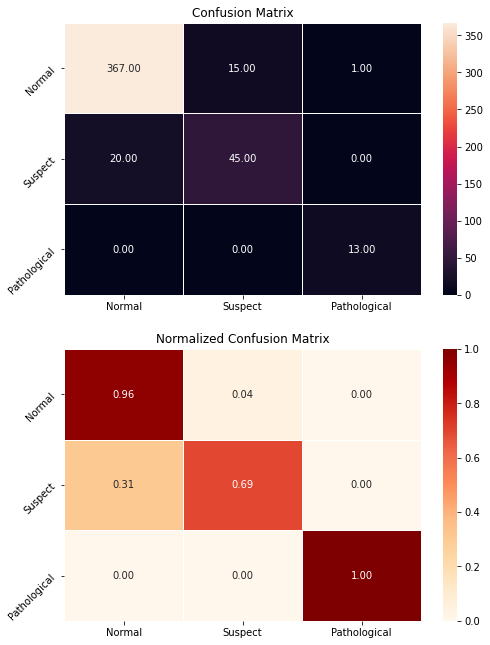

In [43]:
rfc_grid = grid_search.best_estimator_

y_pred_rfc = rfc_grid.fit(X_train_ND, y_train).predict(X_test_ND)

models['RandomForestClassifier'] = accuracy_score(y_test, y_pred_rfc) * 100
evaluator(y_test, y_pred_rfc)

Modelimizdeki RandomForestClassifier sınıflandırma algoritmasının sonuçları yukarıdadır. Rastgele Orman algoritmasını değerlendirmek için, modeli normalize edilmiş eğitim verilerimizle eğitiyoruz. GridSearchCV ile en iyi modeli bulmak için eğitim aşamasını tekrarlıyoruz. En iyi modeli bulduktan sonra normalize edilmiş test verilerimizle tahminimizi yapıyoruz. Bulduğumuz tahmin ve y_test parametrelerini daha önce tasarladığımız "evaluator" fonksiyonuna gönderdik. Sonuç olarak, Random Forest algoritmasının fetal sağlık doğruluk puanı, sınıflandırma raporu, konfüzyon matrisleri ve doğruluk puanlarını öğrendik.

Modelimizi Random Forest Classifier ile eğittiğimizde %92,2 doğruluk puanı elde ettik. Karışıklık matrislerine baktığımızda, Normal için 16, Şüpheli için 20 ve Patolojik için 0 yanlış tahmin olduğunu görebiliriz. Sınıflandırma raporu bize fetal sağlığın doğruluğunu göstermediğinden, bunu kendimiz hesapladık. Random Forest ile Normal için %92, Şüpheli için %92 ve Patolojik için %100 doğruluk oranına ulaştığımızı görüyoruz.

### _K-En Yakın Komşular_

K-NN (K-En Yakın Komşu) algoritması, en basit ve en çok kullanılan sınıflandırma algoritmalarından biridir. K-NN parametrik olmayan, tembel bir öğrenme algoritmasıdır. Tembel kavramını anlamaya çalışırsak, istekli öğrenmenin aksine, tembel öğrenmenin bir eğitim aşaması yoktur. Eğitim verilerini öğrenmez, bunun yerine eğitim veri setini "ezberler". Bir tahmin yapmak istediğimizde, tüm veri setinde en yakın komşuları arar. Algoritmanın çalışmasında bir K değeri belirlenir. Bu K değerinin anlamı, bakılacak eleman sayısıdır. Bir değer geldiğinde, en yakın K eleman sayısı alınarak değer arasındaki mesafe hesaplanır.

In [44]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

param_grid = {
            'n_neighbors':[1,2,3,4,5],
            }

grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train_ND, y_train);

print(grid_search.best_params_ , '\n\n' , grid_search.best_estimator_ )


{'n_neighbors': 4} 

 KNeighborsClassifier(n_neighbors=4)


Accuracy Score : 0.904555 

Classification Report: 
               precision    recall  f1-score   support

      Normal       0.93      0.96      0.94       383
     Suspect       0.73      0.62      0.67        65
Pathological       0.90      0.69      0.78        13

    accuracy                           0.90       461
   macro avg       0.85      0.76      0.80       461
weighted avg       0.90      0.90      0.90       461
 

AUC_ROC Score:  0.8115737545200665 


Accuracy of Normal = 0.9067
Accuracy of Suspect = 0.9132
Accuracy of Pathological = 0.9892




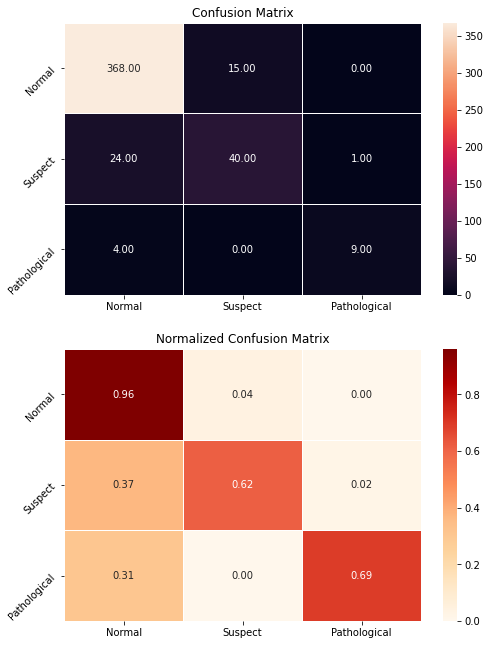

In [45]:
knn_grid = grid_search.best_estimator_

y_pred_knn = knn_grid.fit(X_train_ND, y_train).predict(X_test_ND)

models['KNearestNeighbors'] = accuracy_score(y_test, y_pred_knn) * 100
evaluator(y_test, y_pred_knn)

Modelimizdeki K-Nearest Neighbors sınıflandırma algoritmasının sonuçları yukarıdadır. K-Nearest Neighbors algoritmasını değerlendirmek için modeli normalize edilmiş eğitim verilerimizle eğitiyoruz. GridSearchCV ile en iyi modeli bulmak için eğitim aşamasını tekrarlıyoruz. En iyi modeli bulduktan sonra normalize edilmiş test verilerimizle tahminimizi yapıyoruz. Bulduğumuz tahmin ve y_test parametrelerini daha önce tasarladığımız "evaluator" fonksiyonuna gönderdik. Sonuç olarak, K-En Yakın Komşular algoritmasının fetal sağlık doğruluk puanı, sınıflandırma raporu, kafa karışıklığı matrisleri ve doğruluk puanları hakkında bilgi edindik.

Modelimizi K-Nearest Neighbors ile eğittiğimizde %90,4 doğruluk puanı elde ettik. Karışıklık matrislerine baktığımızda, Normal için 15, Şüpheli için 25 ve Patolojik için 4 yanlış tahmin olduğunu görebiliriz. Sınıflandırma raporu bize fetal sağlığın doğruluğunu göstermediğinden, bunu kendimiz hesapladık. K-Nearest Neighbors ile, Normal için %90, Şüpheli için %91 ve Patolojik için %98 doğruluğa ulaştığımızı görüyoruz.

### _Karar Ağacı Sınıflandırıcısı_

Karar Ağaçları, mevcut durumun entropi değerini azaltan seçimler yaparak bilgi kazanımını en üst düzeye çıkarmaya çalışır. Bunun için her sorudaki hata fonksiyonunu yeniden hesaplar ve en düşük hataya sahip soru / durumu seçer. Ek olarak, Karar Ağaçları makine öğrenimi modelleri arasında insan düşüncesine en yakın olanlar olarak kabul edilir. İnsanların zihnindeki bazı karar ağaçlarının derinliği yukarıdaki gibi 1-2 olsa da, genellikle çok daha karmaşık modeller oluşturulur. Örneğin insan kaynakları departmanında çalışan birinin aklında aşağıdaki gibi bir karar ağacı olabilir. Bir kişi xy yaş aralığındaysa, a, b, c, d, e okullarından mezun olanlar, en az t yıllık deneyime sahipse ve önceki işlerde ortalama çalışma süresi p yıldan fazlaysa, görüşme yapalım.

In [46]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

param_grid = {
            'criterion': ['gini', 'entropy'],
            'max_depth': range(1,3),
            'min_samples_split': range(1,3),
            'min_samples_leaf': range(1,3)
}

grid_search = GridSearchCV(dtc, param_grid, verbose=1, n_jobs=-1, cv=5)
grid_search.fit(X_train_ND, y_train)

print(grid_search.best_params_ , '\n\n' , grid_search.best_estimator_ )

Fitting 5 folds for each of 16 candidates, totalling 80 fits
{'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2} 

 DecisionTreeClassifier(criterion='entropy', max_depth=2)


c:\users\can_a\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.82125255        nan 0.82125255        nan 0.89652854
        nan 0.89652854        nan 0.82055146        nan 0.82055146
        nan 0.89725056        nan 0.89725056]
  warnings.warn(


Accuracy Score : 0.878525 



c:\users\can_a\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\can_a\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\can_a\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Classification Report: 
               precision    recall  f1-score   support

      Normal       0.92      0.94      0.93       383
     Suspect       0.64      0.71      0.67        65
Pathological       0.00      0.00      0.00        13

    accuracy                           0.88       461
   macro avg       0.52      0.55      0.53       461
weighted avg       0.86      0.88      0.87       461
 

AUC_ROC Score:  0.6991261953402946 


Accuracy of Normal = 0.8829
Accuracy of Suspect = 0.9024
Accuracy of Pathological = 0.9718




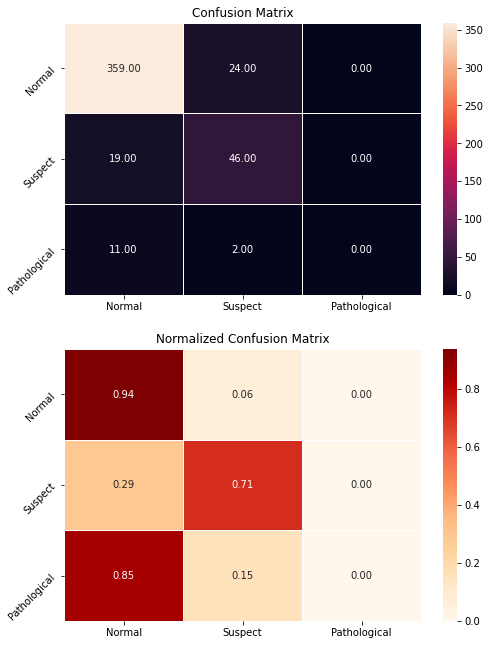

In [47]:
dtc_grid = grid_search.best_estimator_

y_pred_dtc = dtc_grid.fit(X_train_ND, y_train).predict(X_test_ND)

models['DecisionTreeClassifier'] = accuracy_score(y_test,y_pred_dtc) * 100
evaluator(y_test, y_pred_dtc)

Modelimizdeki Karar Ağacı Sınıflandırıcı sınıflandırma algoritmasının sonuçları yukarıdadır. Karar Ağacı Sınıflandırıcı algoritmasını değerlendirmek için modeli normalize edilmiş eğitim verilerimizle eğitiyoruz. GridSearchCV ile en iyi modeli bulmak için eğitim aşamasını tekrarlıyoruz. En iyi modeli bulduktan sonra normalize edilmiş test verilerimizle tahminimizi yapıyoruz. Bulduğumuz tahmin ve y_test parametrelerini daha önce tasarladığımız "evaluator" fonksiyonuna gönderdik. Sonuç olarak, Karar Ağacı Sınıflandırıcı algoritmasının fetal sağlık doğruluk puanı, sınıflandırma raporu, konfüzyon matrisleri ve doğruluk puanlarını öğrendik.

Modelimizi Karar Ağacı Sınıflandırıcısı ile eğittiğimizde %87,9 doğruluk puanı elde ettik. Karışıklık matrislerine baktığımızda, Normal için 24, Şüpheli için 19 ve Patolojik için 13 yanlış tahmin olduğunu görebiliriz. Sınıflandırma raporu bize fetal sağlığın doğruluğunu göstermediğinden, bunu kendimiz hesapladık. Karar Ağacı Sınıflandırıcı ile Normalde %88, Şüpheli için %90 ve Patolojik için %97 doğruluğa ulaştığımızı görüyoruz.

### _Destek Vektör Makinesi (SVM's)_

Destek Vektör Makineleri, genellikle sınıflandırma problemlerinde kullanılan denetimli öğrenme yöntemlerinden biridir. Düzleme yerleştirilen noktaları ayırmak için bir çizgi çizer. Bu, her iki sınıfın noktaları için çizgiyi maksimum mesafede tutmayı amaçlamaktadır. Karmaşık ancak küçük ve orta ölçekli veri kümeleri için uygundur.

In [48]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svm = SVC()

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid_search = GridSearchCV(svm, param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid_search.fit(X_train_ND, y_train)

print(grid_search.best_params_ , '\n\n' , grid_search.best_estimator_ )

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.856 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.903 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.844 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.870 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.862 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.819 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.819 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.822 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.822 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.819 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.819 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.902 total time=   0.0s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.902 total time=   0.0s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.909 total time=   0.0s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.892 total time=   0.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.924 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.888 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.906 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.909 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.877 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.910 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.873 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.880 total time=   0.0s
[CV 5/5] END ....C=1000, gam

Accuracy Score : 0.915401 

Classification Report: 
               precision    recall  f1-score   support

      Normal       0.96      0.94      0.95       383
     Suspect       0.68      0.77      0.72        65
Pathological       1.00      1.00      1.00        13

    accuracy                           0.92       461
   macro avg       0.88      0.90      0.89       461
weighted avg       0.92      0.92      0.92       461
 

AUC_ROC Score:  0.9089423051564044 


Accuracy of Normal = 0.9154
Accuracy of Suspect = 0.9154
Accuracy of Pathological = 1.0000




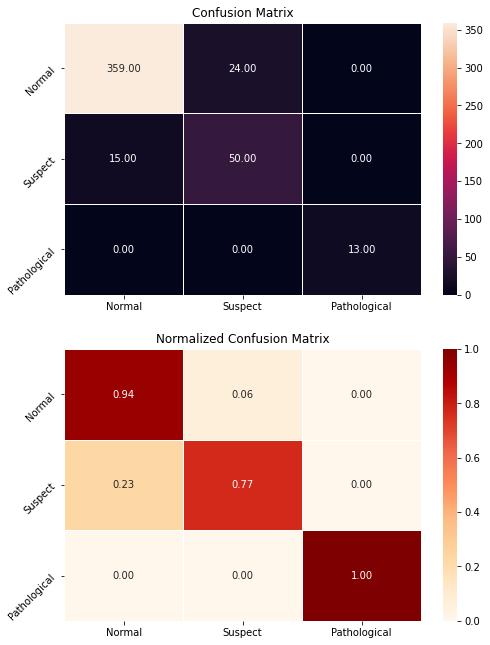

In [49]:
svm_grid = grid_search.best_estimator_

y_pred_svm = svm_grid.fit(X_train_ND, y_train).predict(X_test_ND)

models['SVM'] = accuracy_score(y_test,y_pred_svm) * 100
evaluator(y_test, y_pred_svm)

Modelimizdeki Destek Vektör Makinesi sınıflandırma algoritmasının sonuçları yukarıdadır. Destek Vektör Makinesi algoritmasını değerlendirmek için modeli normalize edilmiş eğitim verilerimizle eğitiyoruz. GridSearchCV ile en iyi modeli bulmak için eğitim aşamasını tekrarlıyoruz. En iyi modeli bulduktan sonra normalize edilmiş test verilerimizle tahminimizi yapıyoruz. Bulduğumuz tahmin ve y_test parametrelerini daha önce tasarladığımız "evaluator" fonksiyonuna gönderdik. Sonuç olarak, Destek Vektör Makinesi algoritmasının fetal sağlık doğruluk puanı, sınıflandırma raporu, konfüzyon matrisleri ve doğruluk puanlarını öğrendik.

Modelimizi Destek Vektör Makinesi ile eğittiğimizde %91,5 doğruluk puanı elde ettik. Karışıklık matrislerine baktığımızda, Normal için 24 yanlış tahmin, Şüpheli için 15 ve Patolojik için 0 olduğunu görebiliriz. Sınıflandırma raporu bize fetal sağlığın doğruluğunu göstermediğinden, bunu kendimiz hesapladık. Destek Vektör Makinesi ile Normalde %91,5, Şüpheli için %91,5 ve Patolojik için %100 doğruluğa ulaştığımızı görüyoruz.

### _Gauss Naif Bayes_

Naive Bayes sınıflandırıcısı, sınıflandırma görevi için kullanılan olasılıklı bir makine öğrenimi modelidir. Sınıflandırıcının noktası Bayes teoremine dayanmaktadır. Bayes teoremini kullanarak, B'nin meydana gelmesi durumunda A'nın oluşma olasılığını bulabiliriz. Burada B kanıt ve A hipotezdir. Burada yapılan varsayım, yordayıcıların / özelliklerin bağımsız olduğudur. Bu, belirli bir özelliğin varlığının diğerini etkilemediği anlamına gelir. Bu yüzden saf denir. Tahmin ediciler sürekli bir değer aldığında ve ayrık olmadığında, bu değerlerin bir gauss dağılımından örneklendiğini varsayıyoruz.

In [50]:
from sklearn.naive_bayes import GaussianNB

nbc = GaussianNB()

param_grid = {
    'var_smoothing': np.logspace(0, -9, num=100)
}

grid_search = GridSearchCV(estimator=nbc, 
                     param_grid=param_grid, 
                     cv=5,
                     verbose=1, 
                     scoring='accuracy')

grid_search.fit(X_train_ND, y_train)

print(grid_search.best_params_ , '\n\n' , grid_search.best_estimator_ )

Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'var_smoothing': 1.0} 

 GaussianNB(var_smoothing=1.0)


Accuracy Score : 0.815618 

Classification Report: 
               precision    recall  f1-score   support

      Normal       0.97      0.81      0.88       383
     Suspect       0.45      0.83      0.59        65
Pathological       0.50      0.85      0.63        13

    accuracy                           0.82       461
   macro avg       0.64      0.83      0.70       461
weighted avg       0.89      0.82      0.84       461
 

AUC_ROC Score:  0.8641423199721178 


Accuracy of Normal = 0.8243
Accuracy of Suspect = 0.8351
Accuracy of Pathological = 0.9718




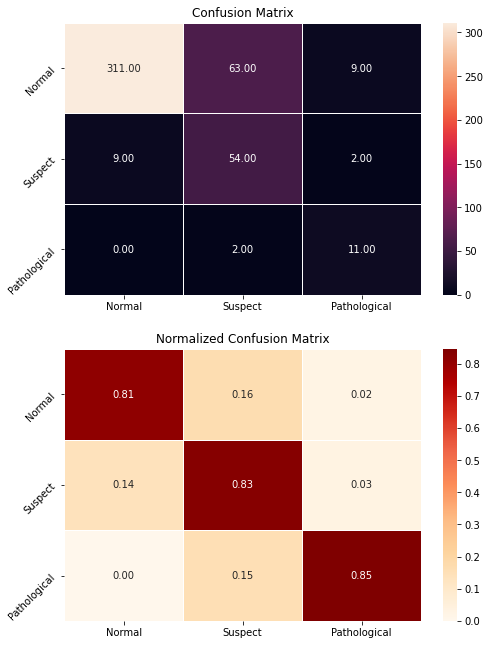

In [51]:
nbc_grid = grid_search.best_estimator_

y_pred_nbc = nbc.fit(X_train_ND, y_train).predict(X_test_ND)

models['NaiveBayes'] = accuracy_score(y_test,y_pred_nbc) * 100
evaluator(y_test, y_pred_nbc)

Modelimizdeki Gaussian Naive Bayes sınıflandırma algoritmasının sonuçları yukarıdadır. Gauss Naive Bayes algoritmasını değerlendirmek için, modeli normalize edilmiş eğitim verilerimizle eğitiyoruz. GridSearchCV ile en iyi modeli bulmak için eğitim aşamasını tekrarlıyoruz. En iyi modeli bulduktan sonra normalize edilmiş test verilerimizle tahminimizi yapıyoruz. Bulduğumuz tahmin ve y_test parametrelerini daha önce tasarladığımız "evaluator" fonksiyonuna gönderdik. Sonuç olarak, Gaussian Naive Bayes algoritmasının fetal sağlık doğruluk puanı, sınıflandırma raporu, konfüzyon matrisleri ve doğruluk puanlarını öğrendik.

Modelimizi Gaussian Naive Bayes ile eğittiğimizde, %81,5 doğruluk puanı elde ettik. Karışıklık matrislerine baktığımızda, Normal için 72, Şüpheli için 11 ve Patolojik için 2 yanlış tahmin olduğunu görebiliriz. Sınıflandırma raporu bize fetal sağlığın doğruluğunu göstermediğinden, bunu kendimiz hesapladık. Gauss Naif Bayes ile Normalde %82, Şüpheli için %83 ve Patolojik için %97 doğruluğa ulaştığımızı görüyoruz.

## 5. Sonuç <a class="anchor" id="conclusion"></a>

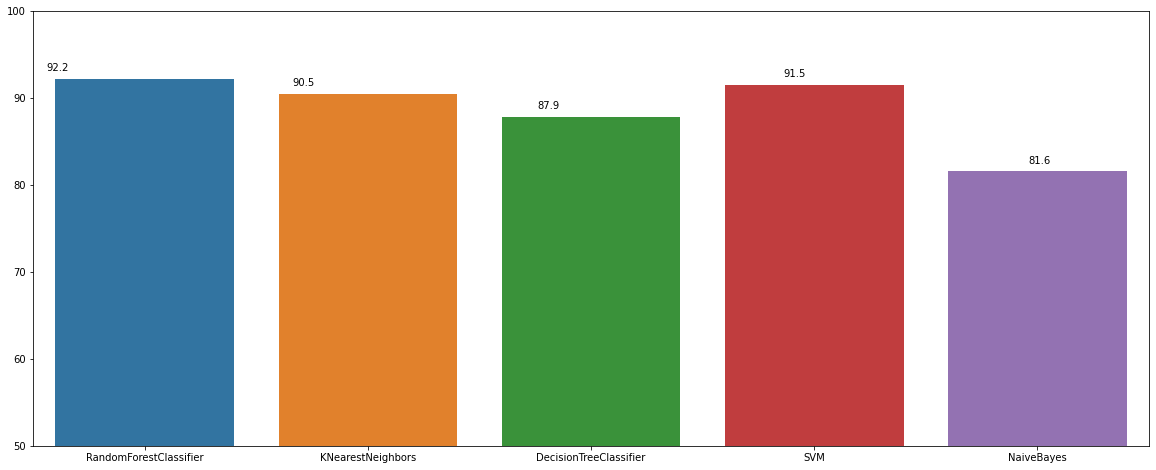

In [52]:
accuracy_scores = pd.Series(models)
fig = sns.barplot(x=accuracy_scores.index, y=accuracy_scores.values)
plt.ylim([50.0,100.0])
for p in fig.patches:
        fig.annotate(str(round(p.get_height(), 1)), (p.get_x() * 1.1, p.get_height() * 1.01))
showFigure(fig, x=20, y=8)

Bu çalışmada, sınıflandırma için en uygun veri bilimi tekniklerini kullanarak kardiyotokogram verilerini karşılaştırdık.

Veri bilimi tekniklerini uygulamadan önce verilerimizi analiz ettik. Analizlerimiz sonucunda verilerimizin çok temiz olduğunu fark ettik. Veri temizleme aşamasına geldiğimizde boş ve NaN verisi olmadığını gördük. Yinelenen 13 satırla birlikte, 270 aykırı değer içeren satırı sildik. Özelliklerin hedef özelliğimizle ilişkisini ve önemini kontrol edin.
Düşük ilişki ve gereksiz özellikleri veri setimizden kaldırdık.

Fetal sağlık için fetal sağlığı tahmin etmek için modelimizi oluşturmak üzere 5 farklı sınıflandırma modeli kullandık.

__1- Random Forest Classifier__

__2- K-Nearest Neighbors__

__3- Decision Tree Classifier__

__4- Support Vector Machine__

__5- Gaussian Naive Bayes__

Bu modeller hem doğrusal hem de Ağaç tabanlı modelleri içerir. Model oluşturmada parametre ayarının çok önemli olduğunu gördük ve Grid Search yaparak elimizdeki veriler için en uygun parametreleri belirledik. Bu yöntemle model doğruluklarında% 2 artış sağladık. Modelin doğruluğunu artırmak için birçok yol denedik, ancak düşük fetal sağlık verileri nedeniyle derin öğrenme yöntemlerini deneyemedik. Böylelikle klasik makine öğrenmesi yöntemlerinde yer alan Random Forest ile %92 oranında en yüksek doğruluğu yakaladık.

%92 doğruluk yeterli görünmese de verinin artmasıyla birlikte derin öğrenme yöntemleriyle bu oranı %98-%99'a çıkarmayı hedefliyoruz.

## 6. Referanslar <a class="anchor" id="references"></a>

__1.__ Kaggle Veri Seti : https://www.kaggle.com/andrewmvd/fetal-health-classification
 
__2.__ Makale : https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6822315/
 
__3.__ Medium Not Defteri : https://medium.com/analytics-vidhya/classification-fetal-health-bd578beae25

__4.__ Makale : https://www.researchgate.net/publication/258858381_Classification_of_Fetal_State_from_the_Cardiotocogram_Recordings_using_ANN_and_Simple_Logistic

__5.__ Kaggle Not Defteri : https://www.kaggle.com/sociopath00/random-forest-using-gridsearchcv

__6.__ Ders Notları : http://yunus.hacettepe.edu.tr/~akal/BBM467/

__7.__ Datacamp : https://learn.datacamp.com/


**Disclaimer!** <font color='grey'>Bu defter Sadık Can Acar ve Mustafa Kollu tarafından *BBM467 - Veri Yoğun Uygulamalar Laboratuvarı* sınıfı için dönem projesi olarak hazırlanmıştır. Not defteri yalnızca eğitim amaçlıdır. Öğrenci çalışması olduğu için sağlanan içeriğin doğruluğu konusunda herhangi bir garanti yoktur.

Herhangi bir telif hakkı ihlali olduğunu düşünüyorsanız, lütfen bize [bildirin](https://forms.gle/BNNRB2kR8ZHVEREq8). 
</font>